# A simple guide to using the current boilerplate code

This code is currently being developed and tested in a local folder. It will then be ported to a python package that can be installed.

This notebook contains examples on how to use the code, plot variables and extract features.

In [1]:
# First import the code and some basic supporting libs
from pynirs.data_objects import Experiment, Event
import matplotlib.pyplot as plt
import numpy as np

Instantiating Experiment object
Loading C:/Users/azaidi02/OneDrive - UBC/Projects/DARPA/data/nirs/Didi Seven Sx alignments/Pre SCI/combined_data_v2.csv
Resampling from 100 to 1 Hz
    ts        ABP        SBP        DBP        MAP    HR (abp)       SpO2  \
0  0.0  69.928946  88.600731  57.821964  68.081552  108.988397  96.958667   
1  1.0  65.271323  84.588301  54.544001  64.558768  125.534244  96.952900   
2  2.0  66.134388  84.100250  54.693975  64.496069  120.489905  97.669710   
3  3.0  67.608300  85.894654  56.567440  66.343177  124.440058  97.481669   
4  4.0  69.227383  88.009463  57.809378  67.876081  120.587805  97.437948   

   HR (nonin)  NKY sync box (dell68)  NKY sync cable (dell69)  ...  \
0  115.072082              -0.123878                 1.118471  ...   
1  120.364519               0.127489                 0.711139  ...   
2  119.074640              -0.132541                -0.362658  ...   
3  119.846589               0.147472                 0.268318  ...   
4  119.

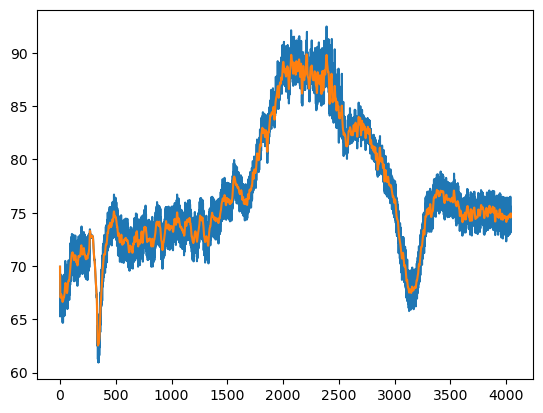

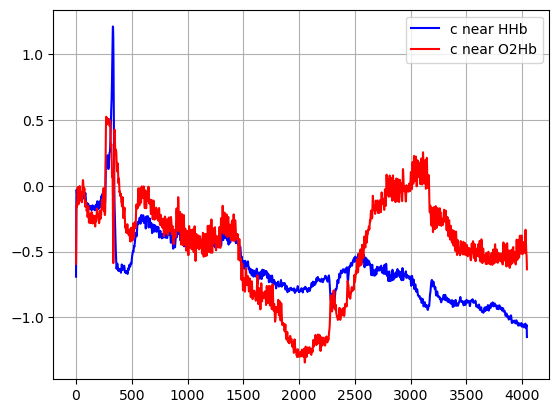

In [2]:
# Create an experiment object by pointing to an aligned NKY file
e = Experiment('C:/Users/azaidi02/OneDrive - UBC/Projects/DARPA/data/nirs/Didi Seven Sx alignments/Pre SCI/combined_data_v2.csv')
# The timeseries data has been saved in the 'data' dataframe that can be accessed with e.data
print(e.data.head())

# Plotting works just like Pandas
e.data['ABP'].plot()

# The object has in-built filtering, which can be done as follows
e.butter() # First create a filter
e.filter() # Then filter the data
e.data['ABP'].plot() # Then plot the result

# You can see that the plots are appended to the same figure


# Alternatively oyou can use Matplotlib.pyplot
plt.figure()
plt.plot(e.data['c near HHb'], 'b')
plt.plot(e.data['c near O2Hb'], 'r')
plt.grid()
plt.legend(['c near HHb', 'c near O2Hb'])


<Axes: >

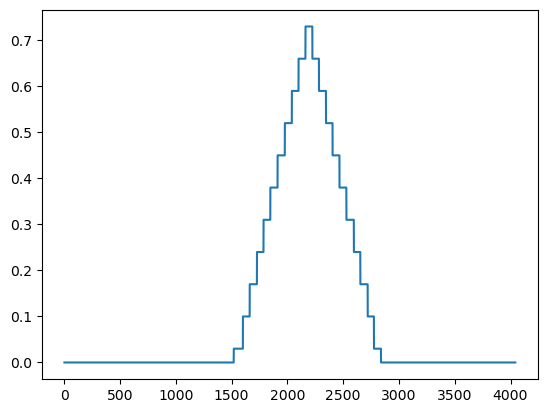

In [3]:
# The object auto-extracts the NE dose from the comments, which is saved as a variable
e.data['NE dose'].plot()

In [4]:
# The object can save itself as a pickled file
e.save('test.experiment')

# To load it back, use the following code
import pickle
with open('test.experiment', 'rb') as f:
    e2 = pickle.load(f)

In [5]:
# There is a log that tracks every manipulation done through the object (but will not track out-of-scope operations)
# For example:

# Get the log
e.get_log()

# Manipulate the data without using the inbuilt functions
e.data = 0
e.get_log()
# Nothing changes

['Instantiating Experiment object',
 'Loading C:/Users/azaidi02/OneDrive - UBC/Projects/DARPA/data/nirs/Didi Seven Sx alignments/Pre SCI/combined_data_v2.csv',
 'Resampling from 100 to 1 Hz',
 "Generating Butterworth filter. Params:{'type': 'butter', 'order': 2, 'Wn': 0.1, 'fs': 1, 'btype': 'lowpass', 'b': array([0.06745527, 0.13491055, 0.06745527]), 'a': array([ 1.       , -1.1429805,  0.4128016])}",
 'Filtering data with lowpass 0.1 Hz']

In [6]:
# You can resample and filter and eff-around as many times as you like 
# If the something isn't working out, you can always reset the object
e.reset()

# But you'll have to redo any resampling and filtering from the start
e.resample(1)
e.butter()
e.filter()
e.get_log()

Reseting data to original values loaded from file.
Resampling from 100 to 1 Hz
Generating Butterworth filter. Params:{'type': 'butter', 'order': 2, 'Wn': 0.1, 'fs': 1, 'btype': 'lowpass', 'b': array([0.06745527, 0.13491055, 0.06745527]), 'a': array([ 1.       , -1.1429805,  0.4128016])}
Filtering data with lowpass 0.1 Hz


['Instantiating Experiment object',
 'Loading C:/Users/azaidi02/OneDrive - UBC/Projects/DARPA/data/nirs/Didi Seven Sx alignments/Pre SCI/combined_data_v2.csv',
 'Resampling from 100 to 1 Hz',
 "Generating Butterworth filter. Params:{'type': 'butter', 'order': 2, 'Wn': 0.1, 'fs': 1, 'btype': 'lowpass', 'b': array([0.06745527, 0.13491055, 0.06745527]), 'a': array([ 1.       , -1.1429805,  0.4128016])}",
 'Filtering data with lowpass 0.1 Hz',
 'Reseting data to original values loaded from file.',
 'Resampling from 100 to 1 Hz',
 "Generating Butterworth filter. Params:{'type': 'butter', 'order': 2, 'Wn': 0.1, 'fs': 1, 'btype': 'lowpass', 'b': array([0.06745527, 0.13491055, 0.06745527]), 'a': array([ 1.       , -1.1429805,  0.4128016])}",
 'Filtering data with lowpass 0.1 Hz']

# Creating and using Event objects

In [7]:
# From an experiment object, various 'event' objets can be created
# Each event is a single physiological challenge

# Get the comments from the experiment object
print(e.comments)

# We can see Hypoxia 1 starts and ends at 263 and 327 respectively

263                                   #* hypoxia 1 start 
327                                     #* hypoxia 1 end 
564                                    #* Baseline Start 
584                                        #* BSL start  
1512                                         #* BSL end  
1519    #* NE start at 0.03ug/kg/min - did not subtrac...
1601                                        #* NE @ 0.10 
1662                                        #* NE @ 0.17 
1727                                        #* NE @ 0.24 
1786                                        #* NE @ 0.31 
1847                                        #* NE @ 0.38 
1912                                        #* NE @ 0.45 
1977                                        #* NE @ 0.52 
2040                                        #* NE @ 0.59 
2100                                        #* NE @ 0.66 
2162                                        #* NE @ 0.73 
2224                     #* NE @ 0.66 - Begin taper down 
2283          

Instantiating Event object


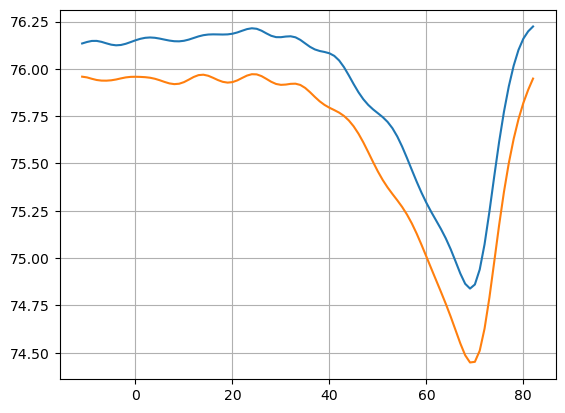

In [8]:

# To create an event, use the experiment object, and provide event start and stop times, and any buffers
evt = Event(e, 263, 327, pre=10, post=20)
plt.plot(evt.data['c toi'])
plt.plot(evt.data['r toi'])

plt.grid()

In [9]:
# The parameters used to initiate the object can be found here
print(evt.init_params)

# It also calculates the duration (in seconds) of the event based on start and stop times
print(evt.duration)

{'pre': 10, 'start': 263, 'stop': 327, 'post': 20, 'detrend': False, 'Experiment': 'Dataset loaded from C:/Users/azaidi02/OneDrive - UBC/Projects/DARPA/data/nirs/Didi Seven Sx alignments/Pre SCI/combined_data_v2.csv with 4044 samples and fs=1'}
65.0


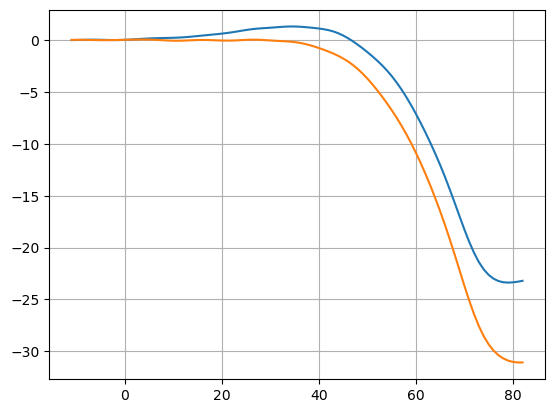

In [10]:
# It can calculate the sum and cumsum for all variables
evt.calc_features()

plt.plot(evt.features["cumsum"]["c toi"])
plt.plot(evt.features["cumsum"]["r toi"])

plt.grid()

In [11]:
from pynirs.sigmoid import Sigmoid
print(help(Sigmoid))

Help on class Sigmoid in module pynirs.sigmoid:

class Sigmoid(builtins.object)
 |  Sigmoid(x_data: numpy.ndarray, y_data: numpy.ndarray, fs=1)
 |  
 |  Object that handles the sigmoid fits to cumsum data. Currently fits sigmoid curves bounded between 0 and 1.
 |  
 |  
 |  Attributes
 |  ----------
 |  x : np.ndarray[float]
 |      Array with timeseries data for interpreting slope and intercept.
 |  
 |  y : np.ndarray[float]
 |      Data to fit sigmoid curve to.
 |  
 |  yhat: np.ndarray[flaot]
 |      The predicted y-values based on the best-fit parameters.
 |  
 |  params: Params
 |      An object with the best fit parameters and their statistics. Type help(Params) for more info.
 |  
 |  params : dict
 |      The parameters returned by the fit() method, along with their covariance matrix. Has the folling attributes.
 |  
 |          means (list[float]): the mean values of the parameters
 |          cov (np.ndarray): the covariance matrix of the paramters
 |          rsquare (float

In [12]:
x_data = evt.data['ts'].to_numpy()
y_data = evt.data['SpO2'].to_numpy()
ctoi_fit = Sigmoid(evt.data['ts'].to_numpy(), evt.data['c toi'].to_numpy(), fs=1)
rtoi_fit = Sigmoid(evt.data['ts'].to_numpy(), evt.data['r toi'].to_numpy(), fs=1)

SigmoidFit(slope:0.23, intercept:64.04)
SigmoidFit(slope:0.17, intercept:62.81)


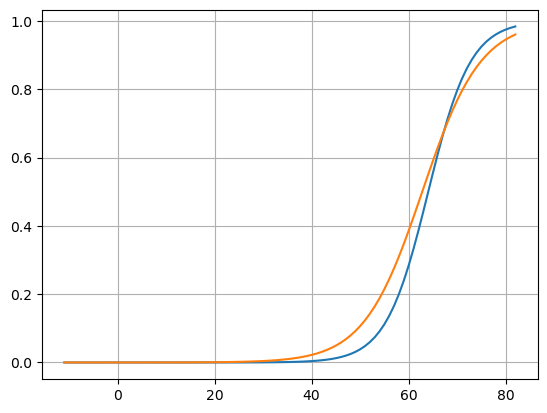

In [13]:
plt.figure()
plt.plot(x_data, ctoi_fit.yhat)
plt.plot(x_data, rtoi_fit.yhat)
plt.grid()

In [14]:
# It is also possible to run t-tests to compare two params
from scipy.stats import ttest_ind_from_stats
ttest_slope = ttest_ind_from_stats(ctoi_fit.params.means[0],
                     np.diag(ctoi_fit.params.cov)[0],
                     len(ctoi_fit.yhat),
                     rtoi_fit.params.means[0],
                     np.diag(rtoi_fit.params.cov)[0],
                     len(rtoi_fit.yhat))

ttest_intercept = ttest_ind_from_stats(ctoi_fit.params.means[1],
                     np.diag(ctoi_fit.params.cov)[1],
                     len(ctoi_fit.yhat),
                     rtoi_fit.params.means[1],
                     np.diag(rtoi_fit.params.cov)[1],
                     len(rtoi_fit.yhat))

print(f"p-values for slope: {ttest_slope[1]:0.4f}, intercept:{ttest_intercept[1]:0.4f}")


p-values for slope: 0.0000, intercept:0.0000
